### Importação dos dados



In [284]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja0 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [289]:
# Coloca todas as lojas em uma lista e cria uma lista com nomes.
lista_lojas = [loja0, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Calcula o faturamento das lojas
faturamento = []
for loja in lista_lojas:
  faturamento.append(float(loja["Preço"].sum()))

# Exibe os resultados
print("Faturamento por Loja:")
for nome, valor in zip(nomes_lojas, faturamento):
    print(f"{nome}: R$ {valor:,.2f}")

Faturamento por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


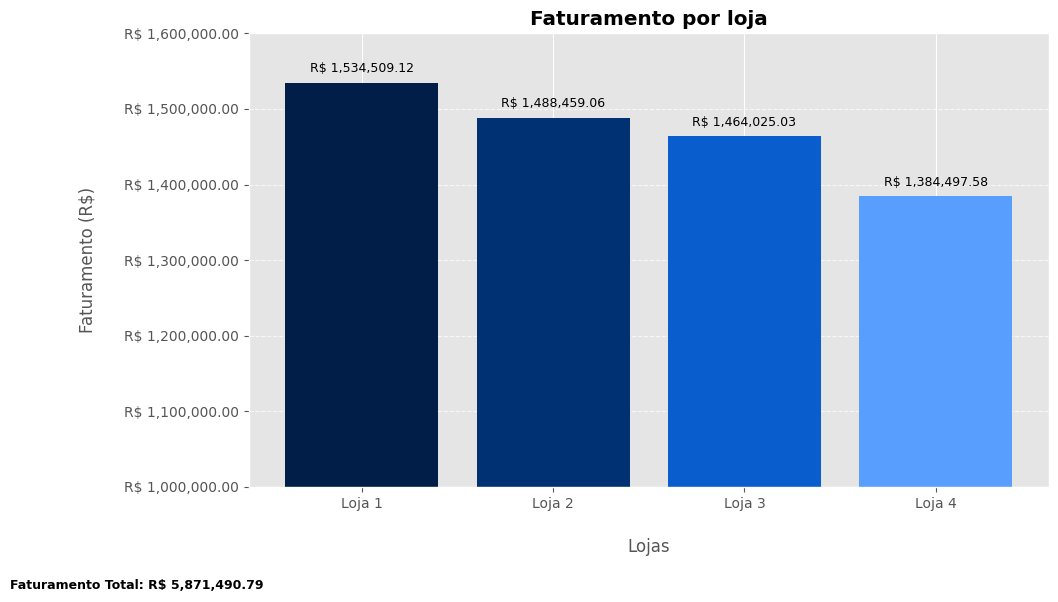

In [395]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

plt.bar(nomes_lojas, faturamento, color=['#001e47', '#003172', '#0a5dcd', '#579eff'])
plt.title('Faturamento por loja', fontweight='bold')
plt.xlabel('Lojas', labelpad=20)
plt.ylabel('Faturamento (R$)', labelpad=20)
faturamento_total = sum(faturamento)

# Adiciona texto com o faturamento total na legenda
plt.figtext(0.2, 0.01, f'Faturamento Total: R$ {faturamento_total:,.2f}',
            ha='right', fontsize=9, fontweight='bold')

# Configuração do formato em reais
def formato_real(x, pos):
    return f'R$ {x:,.2f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formato_real))

# Adiciona os valores no topo de cada barra
for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}',
             ha='center', va='bottom', fontsize=9, rotation=0)

plt.ylim(1000000, 1600000)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas pontilhadas
plt.tight_layout()
plt.savefig('faturamento_loja.png', dpi=300, bbox_inches='tight')
plt.subplots_adjust(bottom=0.18)  # Aumenta o espaço na parte inferior para o texto
plt.show()

# 2. Vendas por Categoria


In [315]:
from tabulate import tabulate

# Conta os produtos por categoria
categorias_loja1 = loja0["Categoria do Produto"].value_counts()
categorias_loja2 = loja2["Categoria do Produto"].value_counts()
categorias_loja3 = loja3["Categoria do Produto"].value_counts()
categorias_loja4 = loja4["Categoria do Produto"].value_counts()

# Preenche valores ausentes com 0 e converte para inteiros
tabela_formatada = tabela_categorias.fillna(0).astype(int)

# Mostra a tabela com bordas
print("Vendas por Categoria de Produto:",)
print(tabulate(tabela_formatada, headers='keys', tablefmt='fancy_grid'))

Vendas por Categoria de Produto:
╒════════════════════════╤══════════╤══════════╤══════════╤══════════╕
│ Categoria do Produto   │   Loja 1 │   Loja 2 │   Loja 3 │   Loja 4 │
╞════════════════════════╪══════════╪══════════╪══════════╪══════════╡
│ brinquedos             │      324 │      313 │      315 │      338 │
├────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ eletrodomesticos       │      312 │      305 │      278 │      254 │
├────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ eletronicos            │      448 │      422 │      451 │      451 │
├────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ esporte e lazer        │      284 │      275 │      277 │      277 │
├────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ instrumentos musicais  │      182 │      224 │      177 │      170 │
├────────────────────────┼──────────┼──────────┼──────────┼──────────┤
│ livros                 │      173 │      1

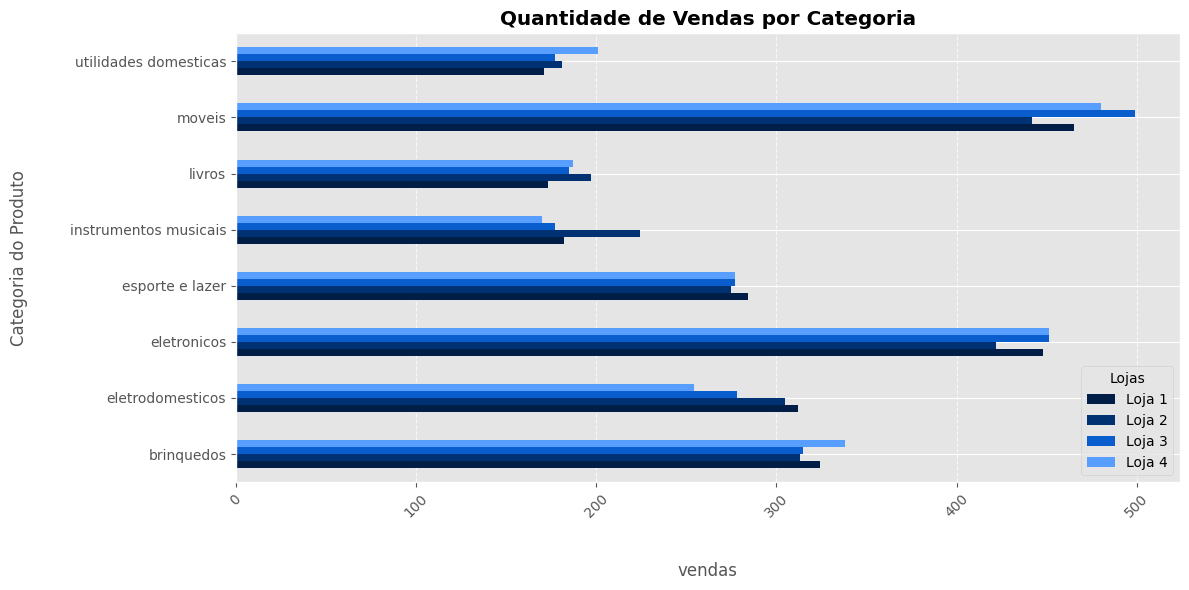

In [392]:
import pandas as pd
import matplotlib.pyplot as plt

for df in [loja0, loja2, loja3, loja4]:
    df.columns = df.columns.str.strip()

categoria_loja1 = loja0["Categoria do Produto"].value_counts()
categoria_loja2 = loja2["Categoria do Produto"].value_counts()
categoria_loja3 = loja3["Categoria do Produto"].value_counts()
categoria_loja4 = loja4["Categoria do Produto"].value_counts()

# Cria DataFrame consolidado
df_categorias = pd.DataFrame({
    "Loja 1": categoria_loja1,
    "Loja 2": categoria_loja2,
    "Loja 3": categoria_loja3,
    "Loja 4": categoria_loja4
}).fillna(0)

color = ['#001e47', '#003172', '#0a5dcd', '#579eff']

df_categorias.plot(kind="barh", figsize=(12, 6), color=color)
bar_width = 0.4
plt.title("Quantidade de Vendas por Categoria", fontweight='bold')
plt.xlabel("vendas",labelpad=30)
plt.ylabel("Categoria do Produto",labelpad=30)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [360]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular média de avaliação em cada loja e armazenando para fácil acesso
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
medias = [media_loja1, media_loja2, media_loja3, media_loja4]

# Exibir na média de avaliação na tela
print("Média de Avaliação por Loja:")
for nome, media in zip(nomes_lojas, medias):
    print(f"{nome}: {media:.2f}")


Média de Avaliação por Loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


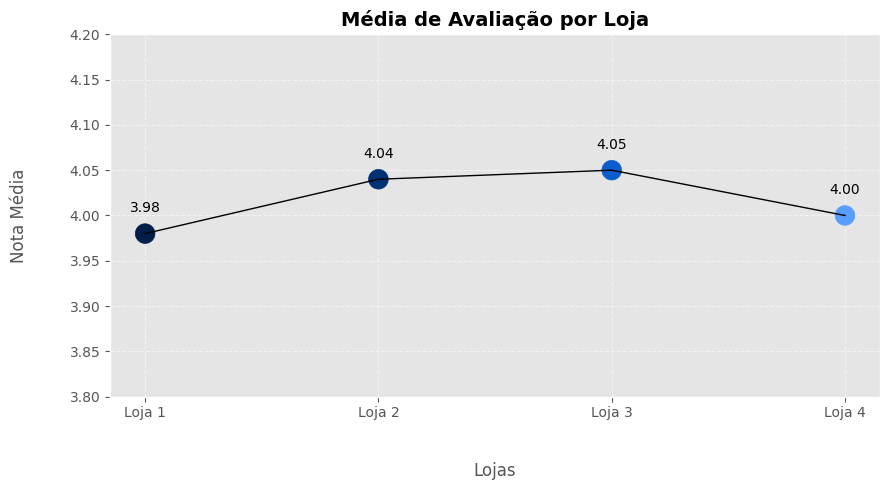

In [400]:
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
cores = ['#001e47', '#003172', '#0a5dcd', '#579eff']

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(9,5))

# Plotando os pontos
plt.scatter(x, avaliacoes, color=cores, s=200)

# Adicionando as linhas de conexão entre os pontos
plt.plot(x, avaliacoes, color='black', linestyle='-', linewidth=1)

# Adicionando os valores acima dos pontos
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.02, f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.title("Média de Avaliação por Loja", fontsize=14, fontweight='bold')
plt.xlabel("Lojas",labelpad=30)
plt.ylabel("Nota Média",labelpad=30)
plt.xticks(x, lojas)  # Define os nomes das lojas no eixo X
plt.ylim(3.8, 4.2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_dispersao_avaliacao_com_linhas.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [417]:
# Função para obter o produto mais e menos vendido
def mais_menos_vendido(loja, nome_loja):
    contagem = loja['Produto'].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    print(f"{nome_loja} - Mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"{nome_loja} - Menos vendido: {menos_vendido} ({contagem.min()} vendas)\n")

# Chamando a função para cada loja
mais_menos_vendido(loja0, "Loja 1")
mais_menos_vendido(loja2, "Loja 2")
mais_menos_vendido(loja3, "Loja 3")
mais_menos_vendido(loja4, "Loja 4")

Loja 1 - Mais vendido: Micro-ondas (60 vendas)
Loja 1 - Menos vendido: Headset (33 vendas)

Loja 2 - Mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3 - Mais vendido: Kit banquetas (57 vendas)
Loja 3 - Menos vendido: Blocos de montar (35 vendas)

Loja 4 - Mais vendido: Cama box (62 vendas)
Loja 4 - Menos vendido: Guitarra (33 vendas)



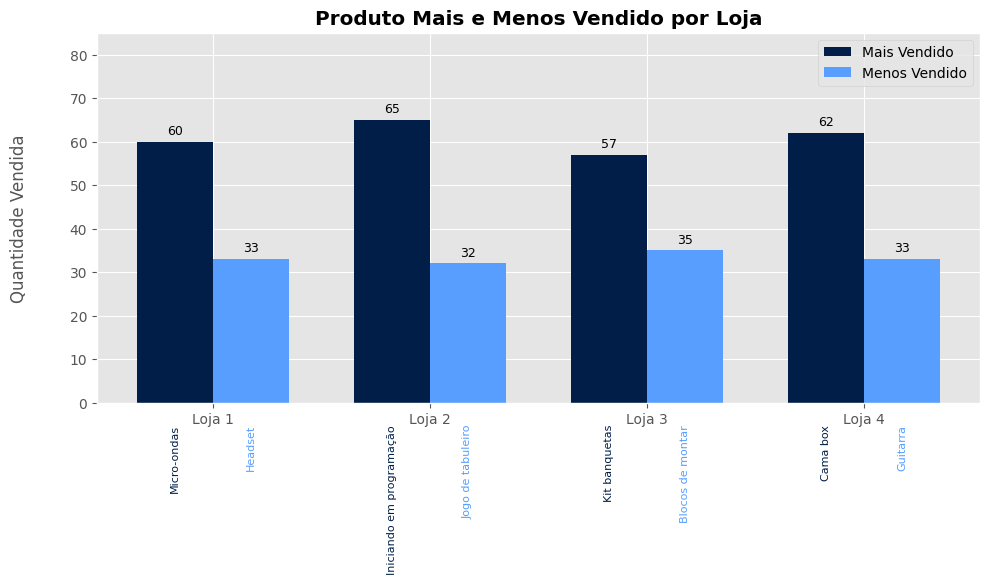

In [447]:
# Função para obter o mais e menos vendido
def mais_menos(loja):
    contagem = loja["Produto"].value_counts()
    return contagem.idxmax(), contagem.max(), contagem.idxmin(), contagem.min()

# Aplicação nas lojas
lojas = [loja0, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
dados = [mais_menos(loja) for loja in lojas]

# Separação dos dados para o gráfico
mais_prod, mais_qtd, menos_prod, menos_qtd = zip(*dados)
x = np.arange(len(nomes))
larg = 0.35

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(x - larg/2, mais_qtd, width=larg, color='#001e47', label='Mais Vendido')
plt.bar(x + larg/2, menos_qtd, width=larg, color='#579eff', label='Menos Vendido')

# Nomes dos produtos abaixo das barras
for i in range(len(x)):
    plt.text(x[i] - larg/2, -5, mais_prod[i], ha='center', va='top', rotation=90, fontsize=8, color='#001e47')
    plt.text(x[i] + larg/2, -5, menos_prod[i], ha='center', va='top', rotation=90, fontsize=8, color='#579eff')

# Quantidade no topo
    plt.text(x[i] - larg/2, mais_qtd[i] + 1, str(mais_qtd[i]), ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + larg/2, menos_qtd[i] + 1, str(menos_qtd[i]), ha='center', va='bottom', fontsize=9)

# Configurações
plt.xticks(x, nomes)
plt.ylabel("Quantidade Vendida",labelpad=30)
plt.title("Produto Mais e Menos Vendido por Loja",fontweight='bold')
plt.legend()
plt.ylim(0, max(mais_qtd) + 20)
plt.tight_layout()
plt.show()



# 5. Frete Médio por Loja


In [478]:
frete_medio_loja1 = loja0["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()


print("Frete Médio por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")

Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


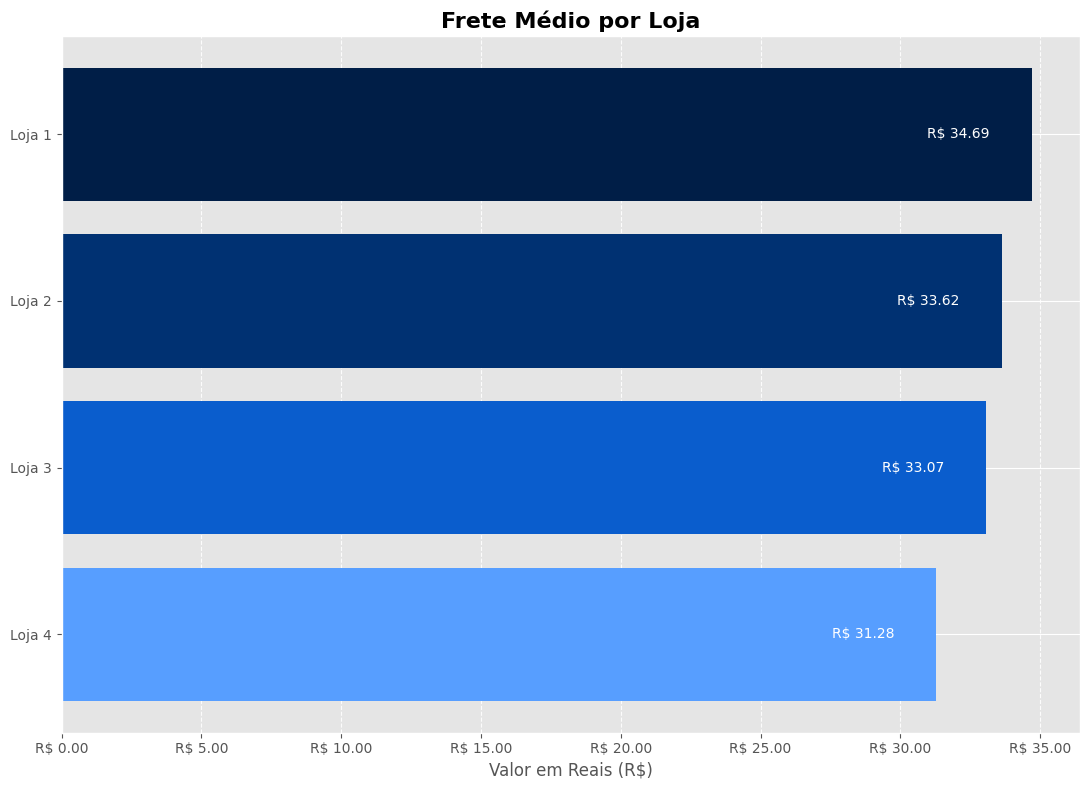

In [500]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Dados
fretes = [34.69, 33.62, 33.07, 31.28]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['#001e47', '#003172', '#0a5dcd', '#579eff']

# Função para formatar valores como R$
def formatar_reais(x, pos):
    return f'R$ {x:.2f}'

# Criando o gráfico de barras horizontais
plt.figure(figsize=(11, 8))
barras = plt.barh(lojas, fretes, color=cores)

# Adicionando os valores dentro das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura - 1.5, barra.get_y() + barra.get_height()/2,
             f'R$ {largura:.2f}', va='center', ha='right', fontsize=10, color='white')

# Estética do gráfico
plt.title('Frete Médio por Loja', fontsize=16, weight='bold')
plt.xlabel('Valor em Reais (R$)', fontsize=12)

# Marcação e grid no eixo X
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_locator(MultipleLocator(5))  # Marca de 5 em 5 R$
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_reais))  # Formata como R$
plt.grid(axis='x', linestyle='--', alpha=0.9, linewidth=0.8)

plt.tight_layout()
plt.show()

#**REATÓRIO FINAL:**

Para iniciar um novo empreendimento, o Senhor João precisa decidir qual das quatro unidades da rede Alura Store vender. A escolha deve ser baseada em dados concretos que apontem qual loja apresenta menor eficiência em termos de faturamento, desempenho de vendas, avaliações de clientes e custos operacionais. Abaixo, seguem os principais indicadores analisados para cada loja:

- **Faturamento Total:** Loja 4 teve o menor faturamento (R$ 1.384.497,58), ficando atrás das demais;

- **Volume de Vendas por Categoria:** Loja 4 vendeu menos eletrodomésticos e instrumentos musicais, e teve desempenho mediano nas outras categorias;

- **Avaliação média dos clientes** Loja 4 teve média de (4,00), abaixo das lojas 2 (4,04) e 3 (4,05);

- **Produto Mais e Menos Vendido:** Apesar de vender bem camas box, a Loja 4 tem como produto menos vendido uma guitarra — o que pode indicar baixa diversidade de interesse em certas categorias;

- **Frete médio** Loja 4 tem o menor custo médio de frete (R$ 31,28), o que é positivo, mas não suficiente para compensar os demais pontos fracos.
---
#**Recomendação Final:**
Com base nos dados apresentados, a Loja 4 é a menos eficiente da rede, apresentando o menor faturamento, avaliações medianas e desempenho mais fraco em categorias relevantes. Apesar do frete médio mais baixo, isso não compensa os resultados inferiores em outras métricas essenciais. Portanto, recomenda-se que o Senhor João venda a Loja 4 para concentrar esforços nas unidades mais rentáveis e com melhor desempenho.

Relatório desenvolvido por Lucas Poterucha: [https://github.com/agenciadigitalslz](https://github.com/agenciadigitalslz)
